In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import csv


In [11]:
def getMeanData(df,h,w):
    filterd_df = (df [(df ['h'] == h) & (df ['w'] == w)])
    mean = filterd_df.mean()
    min = filterd_df.min()
    max = filterd_df.max()
    return (min['time'],mean['time'],max['time']),(min['iterations'],mean['iterations'],max['iterations']) 


In [ ]:
sizes = []
# full range of sizes
# for h in range(2,10):
#    for w in range(2,h+1):
#      sizes.append((h,w,h*w))

#dane dla stałej wielkości heigth
h_const = 9
for h in range(h_const,h_const+1):
   for w in range(2,h+1):
     sizes.append((h,w,h*w))


# for h in range(2,10):
#     sizes.append((h,h,h*h))


sizes = sorted(sizes, key=lambda x: x[2])

In [75]:
df_simple = pd.read_csv("DQN.csv",header=0)
df_memory = pd.read_csv("DQN_memory.csv",header=0)
df_target = pd.read_csv("DQN_target.csv",header=0)
df_full =   pd.read_csv("DQN_memory_target.csv",header=0)

dataFrames = [("simple",df_simple),("memory",df_memory),("target",df_target),("full",df_full)]

dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

ready_data_sorted_by_size = {"simple":[],"memory":[],"target":[],"full":[]}

for df_name,df in dataFrames:
  for h,w,_ in sizes:
    ready_data_sorted_by_size[df_name].append((getMeanData(df,h,w),h*w))

print(ready_data_sorted_by_size["simple"])
print(ready_data_sorted_by_size["memory"])
print(ready_data_sorted_by_size["target"])
print(ready_data_sorted_by_size["full"])

[(((0.0116424, 0.496223314, 2.24193), (77.0, 3279.02, 14960.0)), 4), (((0.0368266, 1.505920222, 6.13997), (235.0, 9733.72, 40294.0)), 9), (((0.0789911, 4.622222602, 10.5232), (472.0, 28853.42, 66826.0)), 16), (((0.64365, 8.3310582, 29.8866), (3756.0, 49863.76, 183213.0)), 25), (((0.652637, 14.46952154, 37.191), (3729.0, 82705.74, 215486.0)), 36), (((2.27984, 18.440775, 66.2073), (12136.0, 96013.64, 354084.0)), 49), (((0.467509, 32.243411380000005, 90.7626), (2093.0, 157954.88, 453328.0)), 64), (((5.62767, 42.34724739999999, 110.913), (25618.0, 191572.2, 510548.0)), 81)]
[(((0.00546057, 0.7041519422, 3.00105), (38.0, 4776.64, 20195.0)), 4), (((0.00906682, 2.5552915944, 7.90617), (51.0, 16898.74, 52391.0)), 9), (((0.0415366, 3.6332274819999997, 13.2857), (265.0, 23205.88, 84598.0)), 16), (((0.026742, 5.675642274, 21.5308), (159.0, 34835.02, 131775.0)), 25), (((1.38271, 8.4743502, 35.4215), (8131.0, 49424.4, 205858.0)), 36), (((0.246145, 12.241120239999997, 54.7308), (1325.0, 65142.24, 29

# Prezentacja danych na wykresie 2D

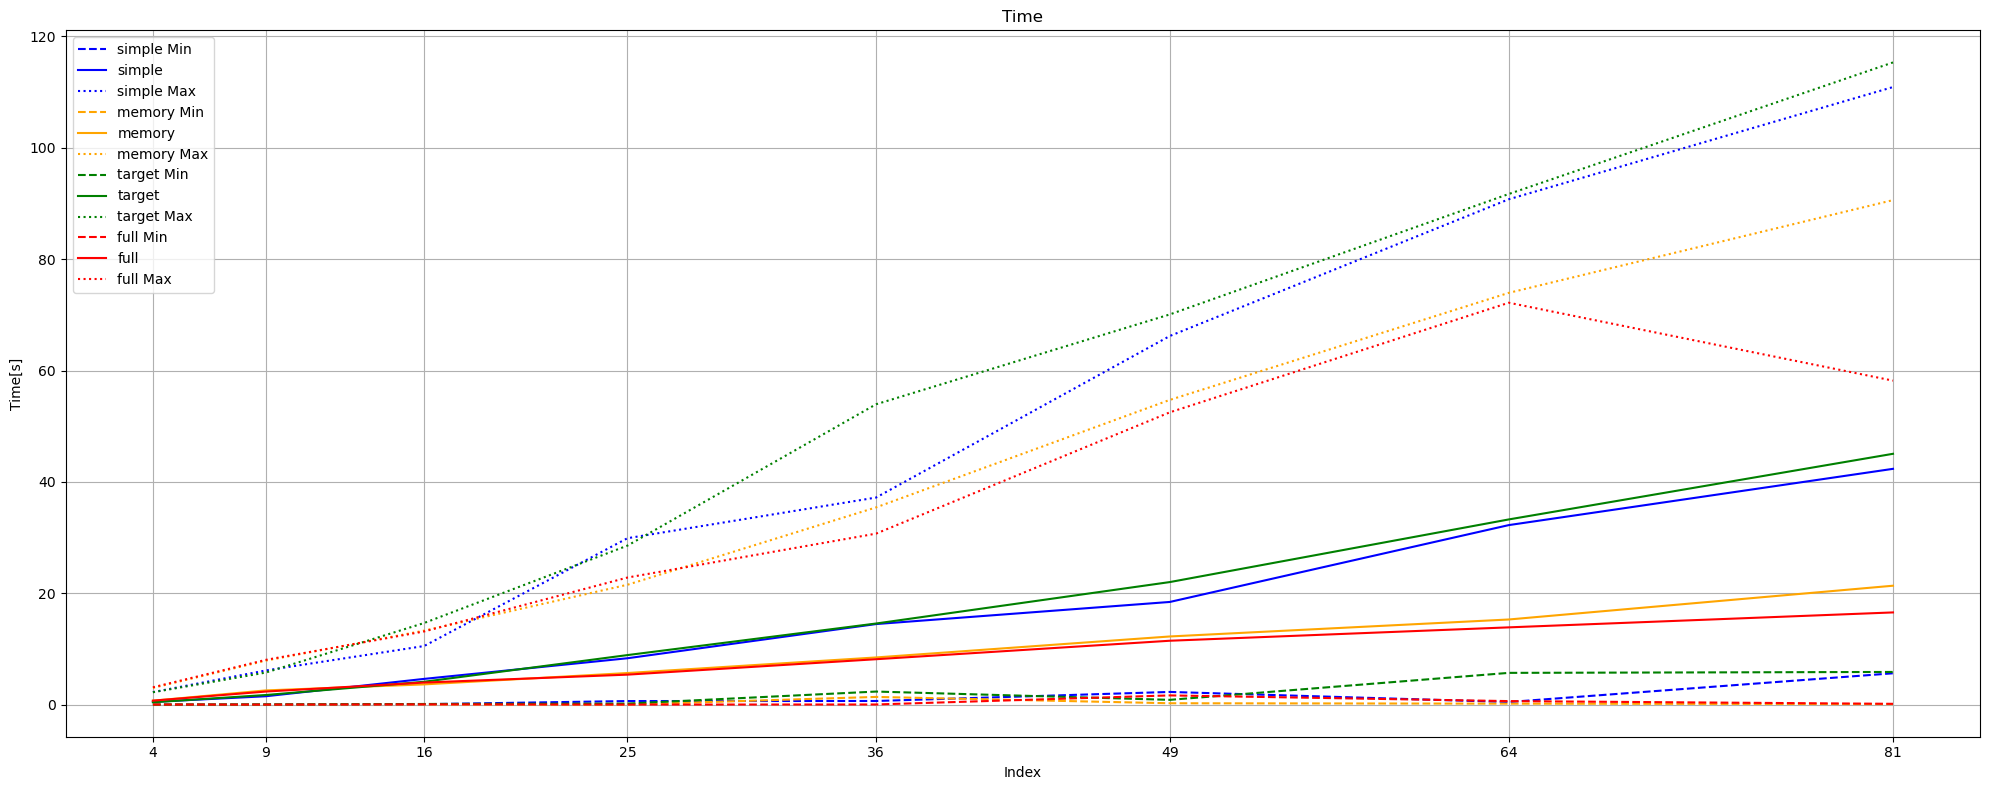

In [76]:
# Time data (min, mean, max)

fig, ax = plt.subplots(figsize=(20, 8))

for color,type in dqn_types:
    time_min = ([x[0][0][0] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for min value plot
    time_mean = ([x[0][0][1] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] ) 
    time_max = ([x[0][0][2] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for max value plot


    # Plot time data
    ax.plot(time_min[1],time_min[0], label=type + ' Min', color=color, linestyle='--') #uncoment for min value plot
    ax.plot(time_mean[1],time_mean[0], label=type, color=color, linestyle='-')
    ax.plot(time_max[1],time_max[0], label=type + ' Max', color=color, linestyle=':') #uncoment for max value plot


ax.set_xticks(time_mean[1])
ax.set_title('Time')
ax.set_xlabel('Index')
ax.set_ylabel('Time[s]')
ax.legend()

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations data


# Display the plot
plt.grid()
plt.tight_layout()
plt.show()


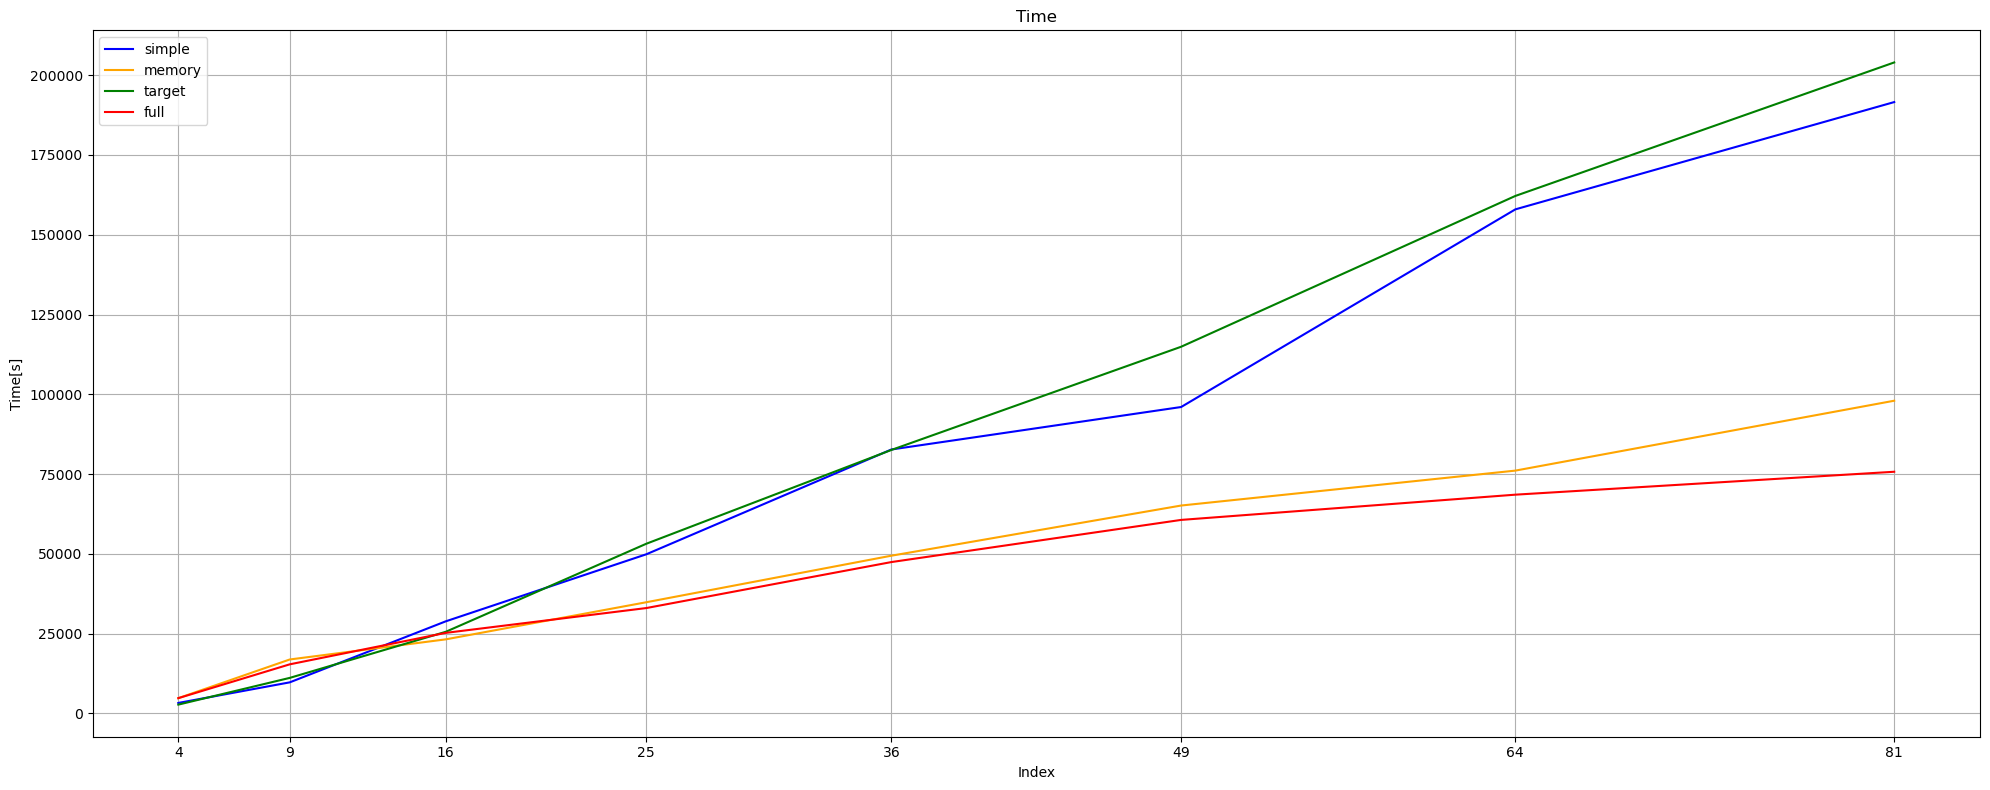

In [77]:
# Iterations data (min, mean, max)
fig, ax = plt.subplots(figsize=(20, 8))

for color,type in dqn_types:
    #time_min = ([x[0][1][0] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for min value plot
    iter_mean = ([x[0][1][1] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] ) 
    #time_max = ([x[0][1][2] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for max value plot


    # Plot time data
    #ax.plot(time_min[0], label='Time Min', color='blue', linestyle='--') #uncoment for min value plot
    ax.plot(iter_mean[1],iter_mean[0], label=type, color=color, linestyle='-')
    #ax.plot(time_max[0], label='Time Max', color='blue', linestyle=':') #uncoment for max value plot


# for i,label in enumerate(time_mean[1]):
#     ax.text(i, 0, label, fontsize=9, ha='right', va='bottom', color='blue')
ax.set_xticks(iter_mean[1])
ax.set_title('Time')
ax.set_xlabel('Index')
ax.set_ylabel('Time[s]')
ax.legend()

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations data


# Display the plot
plt.grid()
plt.tight_layout()
plt.show()

# Histogram Danych

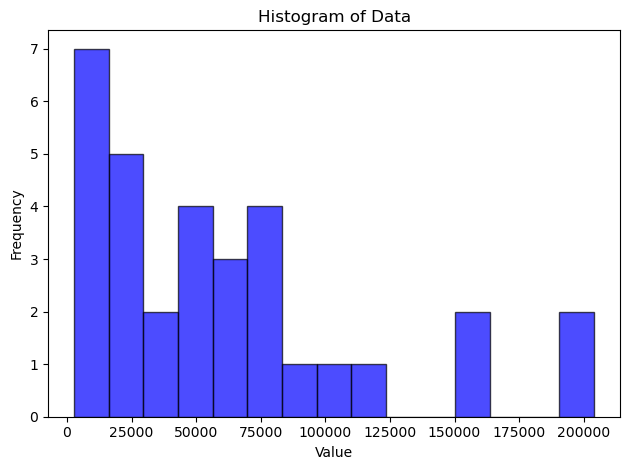

In [89]:
data =[]
for color,type in dqn_types:
    #time_min = ([x[0][1][0] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] )  #uncoment for min value plot
    # = ([x[0][1][1] for x in ready_data_sorted_by_size[type]], [x[1] for x in ready_data_sorted_by_size[type]] ) 
    data += [x[0][1][1] for x in ready_data_sorted_by_size[type]]

plt.hist(data, bins=15, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()